In [107]:
import random as r
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
r.seed(256)

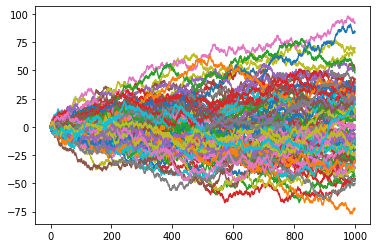

In [36]:
# Random walk

step = lambda : 1 if r.random() < 0.5 else -1
n = 1000
runs = 100

for i in range(runs):
    steps = [step() for i in range(n)]
    walk = np.cumsum(steps) 
    plt.plot(walk)

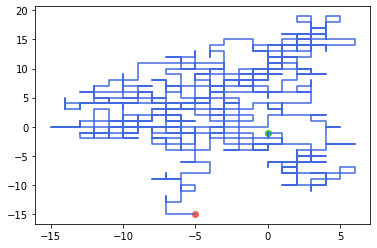

In [84]:
# 2D Random walk

def step_2D():
    z = r.random()
    if z < 0.25:
        return (0,1)
    elif z < 0.5:
        return (0,-1)
    elif z < 0.75:
        return (1,0)
    return (-1,0)

n = 1000
runs = 1
colors = ["royalblue", "gold", "slateblue", "orange", "tomato"]

for i in range(runs):
    steps = [step_2D() for i in range(n)]
    sx = np.cumsum([s[0] for s in steps])
    sy = np.cumsum([s[1] for s in steps])
    plt.plot(sx, sy, color=colors[i])
    plt.scatter(sx[0], sy[0], color="limegreen")
    plt.scatter(sx[-1], sy[-1], color="tomato")

In [92]:
# Montecarlo

f = lambda x : (1 - x**2)**1.5
a, b = 0, 1
N = np.logspace(2, 8, num=7, base=10, dtype=int)
V = 1 - 0

mean = lambda f, n, a, b : 1/n * sum(f(r.uniform(a, b)) for i in range(n))
mean_sq = lambda f, n, a, b : 1/n * sum(f(r.uniform(a, b))**2 for i in range(n))

def montecarlo(f, n, a, b, v):
    m = mean(f, n, a, b)
    m2 = mean_sq(f, n, a, b)
    return v*m + v*(((m2 - m**2)/n)**0.5)

def timer(f, *args):
    t = time.time()
    r = f(*args)
    print("{:f} seconds".format(time.time() - t))
    return r

for n in N:
    x = timer(montecarlo, f, n, a, b, V)
    print("n = {:.0e}, x = {:.6f}".format(n, x))

0.001524 seconds
n = 1e+03, x = 0.611751
0.019528 seconds
n = 1e+04, x = 0.596443
0.136288 seconds
n = 1e+05, x = 0.589747
1.280250 seconds
n = 1e+06, x = 0.589542
12.372922 seconds
n = 1e+07, x = 0.589087
127.474342 seconds
n = 1e+08, x = 0.589061


In [ ]:
# Ejercicio 4

f = lambda x: np.exp(-x)
sol = lambda x: 0 if x == 0 else 1 if x == np.inf else np.exp(1 - 1/x)
valor_real = sol(1) - sol(0)

N = np.logspace(2, 8, num=7, base=10, dtype=int)
V = 1 - 0

# Cambio variable
fy = lambda y: 1/(y**2) * np.exp(1 - 1/y)
a, b = 0, 1

for n in N:
    x = timer(montecarlo, fy, n, a, b, V)
    print("n = {:.0e}, x = {:.6f}, err = {:.2e}".format(n, x, abs(x - valor_real)))

In [110]:
# Ejercicio 5

R = 1.5
V = 4 * R**2

f = lambda x, y, R: 0 if x**2 + y**2 > R**2 else 1
valor_real = np.pi * R**2

mean2 = lambda f, n, R: 1/n * sum(f(r.uniform(-R, R), r.uniform(-R, R), R) for i in range(n))

for n in N:
    S = timer(lambda : V*mean2(f, n, R))
    print("n = {:.0e}, x = {:.6f}, err = {:.2e}".format(n, S, abs(S - valor_real)))

0.000206 seconds
n = 1e+02, x = 6.840000, err = 2.29e-01
0.002125 seconds
n = 1e+03, x = 7.128000, err = 5.94e-02
0.022414 seconds
n = 1e+04, x = 7.008300, err = 6.03e-02
0.132998 seconds
n = 1e+05, x = 7.046730, err = 2.19e-02
1.075225 seconds
n = 1e+06, x = 7.068564, err = 1.95e-05
10.351688 seconds
n = 1e+07, x = 7.069271, err = 6.88e-04
102.605128 seconds
n = 1e+08, x = 7.068863, err = 2.80e-04


In [111]:
# Ejercicio 6

R = 1.5

f = lambda x, y, z, R: 0 if x**2 + y**2 + z**2 > R**2 else 1
valor_real = 4/3 * np.pi * R**3

mean3 = lambda f, n, R: 1/n * sum(f(r.uniform(-R, R), r.uniform(-R, R), r.uniform(-R, R), R) for i in range(n))

for n in N:
    V = timer(lambda : (2*R)**3 * mean3(f, n, R))
    print("n = {:.0e}, x = {:.6f}, err = {:.2e}".format(n, V, abs(V - valor_real)))

0.000301 seconds
n = 1e+02, x = 11.070000, err = 3.07e+00
0.003206 seconds
n = 1e+03, x = 13.392000, err = 7.45e-01
0.027706 seconds
n = 1e+04, x = 13.902300, err = 2.35e-01
0.161929 seconds
n = 1e+05, x = 14.153130, err = 1.60e-02
1.547537 seconds
n = 1e+06, x = 14.129721, err = 7.45e-03
14.113039 seconds
n = 1e+07, x = 14.142940, err = 5.77e-03
140.748972 seconds
n = 1e+08, x = 14.137209, err = 4.17e-05
